# EDA: Exploratory Data Analysis and Feature Engineering

## References

Code snippets have been taken from the following resources:
- https://www.kaggle.com/sashr07/kaggle-titanic-tutorial
- https://github.com/gunesevitan/kaggle

Participants will learn today: <br>
- Exploratory data analysis

## Introduction to the dataset & Kaggle 

Today we will use the skills we have learned in previous sessions to analyse the Titanic dataset. It contains data of passengers aboard the Titanic and a value (0 or 1) that indicates whether someone survided or not.

The dataset can be found in different sources, the set we are using here has been retrieved from the Kaggle website (quickly show Kaggle in browser: https://www.kaggle.com/). On Kaggle, you can take part in ML competitions and improve your skills. There are also useful tutorials to learn about the platform and some competetitions are developed for beginners to get to know the ML workflow.

Make sure to refer to the content guide of week 5 on a quick summary of the different steps of an EDA

### EDA of Titanic dataset 

First steps will be to load the dataset, get an overview and analyse the columns names:

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_dataset_training.csv to Titanic_dataset_training.csv


In [2]:
import pandas as pd

titanic = pd.read_csv("Titanic_dataset_training.csv")

print(titanic.shape)

(891, 12)


In [ ]:
import pandas as pd
df = pd.read_csv("Titanic_dataset_training.csv")
print(df.shape)

(891, 12)


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Column names
* `PassengerId` is the unique id of the passenger (i.e. the row)
* `Survived` is the target variable we are trying to predict
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical feature
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature


Find out the values of the categorical variables `Survived`, `Pclass` and `Embarked`

In [ ]:
df.Pclass.unique()

array([3, 1, 2])

In [ ]:
df.Survived.unique()

array([0, 1])

##### Solution
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

#### Checking for missing values

In [ ]:
df.isnull().sum() # sum all num values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Function Definition
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    


#functioncall  
display_missing(df)

PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2




The columns Age, Cabin and embarked show the most missing values. But because we want to keep it simple in this example, we will only deal with one of these columns in the following. 

Especially for the Cabin feature, we see that 75% of the data for Cabin is missing. If there is a lower percentage, we have a chance of treating the missing values but with way more than half of the values missing, we cannot work with that column.

It is always good to be able to use some domain knowledge when analysing your dataset. Our goal now is to find out the best predictors for the survival of a passenger. In order to do so, some of you might remember from watching the Titanic movie, that there were two facts that were striking:
- there were not enough live boats for everyone, so women and children were given preference to boarding the live boats
- there was a hugh class disparity

--> This let's us assume that the features Sex and Age as wel as PClass could be of major importance for our prediction.

#### Filling in missing values of age column

One way to fill in the missing values would be to fill in with the mean values over all observations:

In [ ]:
df.Age.median()

28.0

So this would be 30 years. But we can also try to fill in these values with a little better assumption, by checking if there is some sort of correlation between the age and the other features in the dataset:

In [ ]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()# sorting the column 

In [ ]:
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)


In [ ]:
df_corr[df_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


We see that the highest correlation is between age and Pclass with a value of 0.37 (don't worry, we will talk about correlations in more detail in our session on statistics. But what this means is that we have a statistical relationship between these two variables. If we know the Pclass we can make a better assumption about the age.

We can even generate a more accurate estimation for age by including the gender:

In [ ]:
age_by_pclass_sex = df.groupby(['Sex', 'Pclass']).median()['Age']
print(age_by_pclass_sex)

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [ ]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
age_by_pclass_sex = titanic.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(titanic['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


Now we need to fill in the values:

In [ ]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
df.Age.isnull().sum()

0

Check if everything worked:

In [ ]:
print('Age column missing values:' + str(df.Age.isnull().sum()))

Age column missing values:0


#### Analysing Sex, Age and Pclass

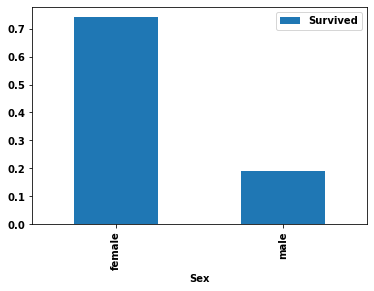

In [ ]:
# create and plot a pivot table
import matplotlib.pyplot as plt
sex_pivot = titanic.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

We can see, that more female than male passengers survived the Titanic disaster. <br>
We can repeat this for the Pclass column:

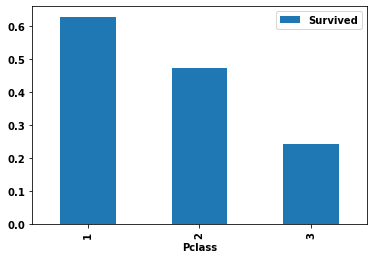

In [ ]:
# create and plot a pivot table
pclass_pivot = titanic.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar()
plt.show()

Also here our assumption was right: the proportion of survivers among 1st class passengers was significantly higher than in the 3rd class.

We can now check the age column which is a numerical feature and analyse the importance of age. We need to treat it differently than a categorical feature when analysing the data. One solution is to use histograms:

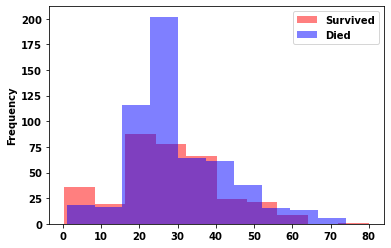

In [ ]:
survived = titanic[titanic["Survived"] == 1]
died = titanic[titanic["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=10)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=10)
plt.legend(['Survived','Died'])
plt.show()

We can also generate a nicer visualisation using seaborn:

In [ ]:
titanic['Age_category'] = pd.qcut(titanic['Age'], 10)

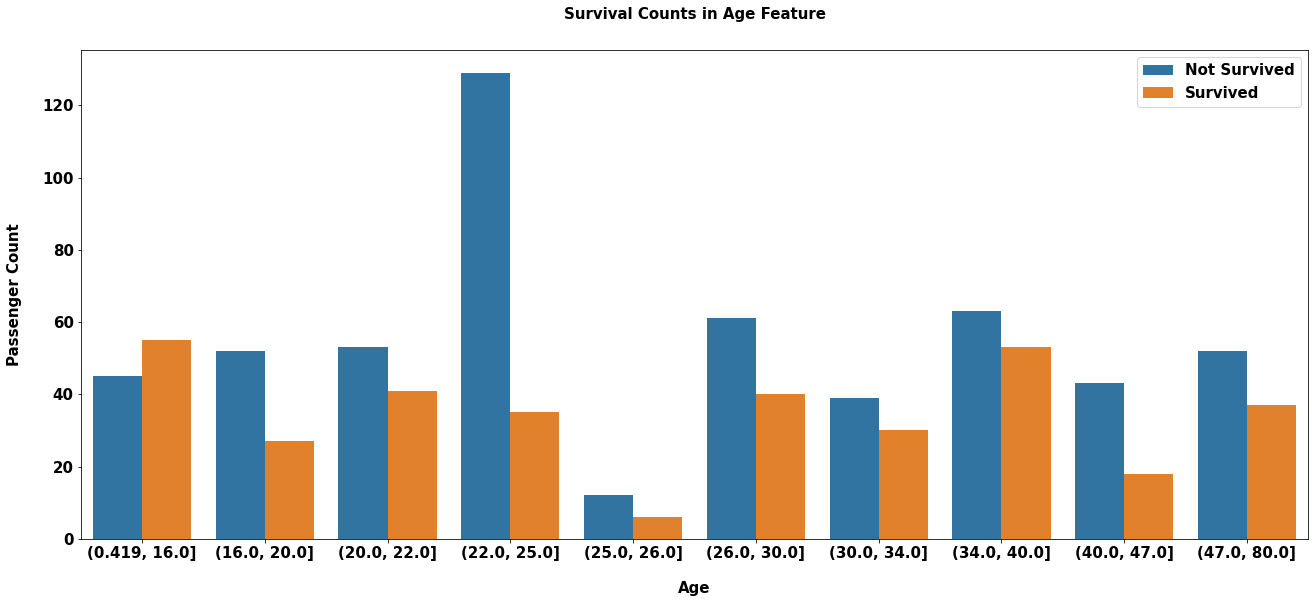

In [ ]:
import seaborn as sns

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age_category', hue='Survived', data=titanic)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

You can play around with the number of bins in the histograms but what the overall message is that we see here is the following: In some age groups (infants), more passengers survived than died (red bar higher than blue). In other age groups there were more deaths than survivors. This indicates that taking the age into consideration can improve our model performance.

We can account for these different survival rates by creating a new column and creating categories based on the age:

We will use the ```pandas.cut()``` function.


We can then use that function on the ```titanic``` dataframes (note: this is the training dataset, we would need to perform the same operation on the test dataset as well, because we treated the missing values, we also do not need to treat them as shown in the diagram).

```python
def process_age(df,cut_points,label_names):
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)
```

Note that the cut_points list has one more element than the label_names list, since it needs to define the upper boundary for the last segment.

In [ ]:
# function definition
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

#Assigning values to parameters
cut_points = [-1,0,18,100]
label_names = ["Missing","Child","Adult"]

# function call
df = process_age(df,cut_points,label_names)

In [ ]:
df.shape

(891, 13)

### One-hot encoding

We have identified three columns that may be useful for predicting survival:

* Sex
* Pclass
* Age, or more specifically our newly created Age_categories

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can't understand text labels, so we have to convert our values into numbers. This process is called one-hot encoding.

Additionally, we need to be careful that we don't imply any numeric relationship where there isn't one. If we think of the values in the Pclass column, we know they are 1, 2, and 3.

In [ ]:
df['Pclass'].value_counts()
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn't "worth" double what class 1 is, and class 3 isn't "worth" triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass:

Let's use that function to create dummy columns for both the Sex and Age_categories columns.

Use the create_dummies() function to create dummy variables for the Sex column. Use the create_dummies() function to create dummy variables for the Age_categories column (the same needs to be done for the test dataset with which we want to evaluate our ML model.

In [ ]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
column_name = "Pclass"
df_1 = df.copy()
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [ ]:
# defining the function
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

df = create_dummies(df,"Pclass")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,0,1


In [ ]:
titanic = create_dummies(titanic,"Sex")
titanic = create_dummies(titanic,"Age_categories")

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_category,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Child,Age_categories_Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(20.0, 22.0]",Adult,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(34.0, 40.0]",Adult,1,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(25.0, 26.0]",Adult,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(34.0, 40.0]",Adult,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(34.0, 40.0]",Adult,0,0,1,0,1,0,0,1


## Even further analysis

With the steps above you have performed a well-rounded EDA but there is always more to explore behind our data. Let's say we wanted to take into consideration other features as well. We know from before that the training set has only missing values in the age and cabin column. Checking the test dataset, we see that we have some more missing features in the Fare column and there are two missing values in the Embarked column of the training dataset. How can we deal with them?

In [ ]:
titanic_test = pd.read_csv("Titanic_dataset_test.csv")

print(titanic_test.shape)

(418, 11)


In [ ]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
titanic.isnull().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2
Age_category                0
Age_categories              0
Pclass_1                    0
Pclass_2                    0
Pclass_3                    0
Sex_female                  0
Sex_male                    0
Age_categories_Missing      0
Age_categories_Child        0
Age_categories_Adult        0
dtype: int64

### Fare 

In [ ]:
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


We have one passenger with a missing Fare entry. He travelled in 3rd class and with no sibling or spouse. We will assume that his fare was similar to the mean value of other male passengers travelling in the same class and without family:

In [ ]:
med_fare = titanic_test.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
titanic_test['Fare'] = titanic_test['Fare'].fillna(med_fare)

### Embarked

In [ ]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_category,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Child,Age_categories_Adult
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,...,"(34.0, 40.0]",Adult,1,0,0,1,0,0,0,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,...,"(47.0, 80.0]",Adult,1,0,0,1,0,0,0,1


Sometimes we can find out more about our dataset (in this case the historical circumstances) by researching more (in this case about the passengers):

**Stone, Mrs. George Nelson (Martha Evelyn)**embarked from **S (Southampton)** with her maid **Amelie Icard**, in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html).

> *Mrs Stone boarded the Titanic in Southampton on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.*

Missing values in `Embarked` are filled with **S** with this information.

In [ ]:
# Filling the missing values in Embarked with S
titanic['Embarked'] = titanic['Embarked'].fillna('S')

## References 
**Next section is optional You dont need to do this part**

This is a modified Kaggle tutorial. You can find the original version here:
    https://www.kaggle.com/sashr07/kaggle-titanic-tutorial

# Final preprocessing steps

Remember that we start with a dataset without any missing data:

In [ ]:
titanic.isnull().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    0
Age_category                0
Age_categories              0
Pclass_1                    0
Pclass_2                    0
Pclass_3                    0
Sex_female                  0
Sex_male                    0
Age_categories_Missing      0
Age_categories_Child        0
Age_categories_Adult        0
dtype: int64

But still, we need to preprocess some parts of the test-dataset because we haven't done so in the previous session. We will need to classify the ages in age groups and one-hot encode these age categoeries, pclass and sex. 

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_category,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Child,Age_categories_Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(20.0, 22.0]",Adult,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(34.0, 40.0]",Adult,1,0,0,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(25.0, 26.0]",Adult,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(34.0, 40.0]",Adult,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(34.0, 40.0]",Adult,0,0,1,0,1,0,0,1


In [ ]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_test = process_age(titanic_test,cut_points,label_names)

titanic_test = create_dummies(titanic_test,"Pclass")
titanic_test = create_dummies(titanic_test,"Sex")
titanic_test = create_dummies(titanic_test,"Age_categories")

In [ ]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Child,Age_categories_Adult
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Adult,0,0,1,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Adult,0,1,0,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Adult,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Adult,0,0,1,1,0,0,0,1


Now that our data has been prepared, we are ready to train our first model. The first model we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

* Instantiate (or create) the specific machine learning model you want to use
* Fit the model to the training data
* Use the model to make predictions
* Evaluate the accuracy of the predictions
* Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class.

We'll start by looking at the first two steps. First, we need to import the class:

```python
from sklearn.linear_model import LogisticRegression
```

Next, we create a LogisticRegression object:

```python
lr = LogisticRegression()
```

Lastly, we use the ```LogisticRegression.fit()``` method to train our model. The ```.fit()``` method accepts two arguments: X and y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

```python
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])
```

The code above fits (or trains) our LogisticRegression model using three columns: Pclass_2, Pclass_3, and Sex_male.

Let's train our model using all of the columns we created above.

### Instructions

* Instantiate a LogisticRegression object called lr.
* Use LogisticRegression.fit() to fit the model on the train dataset using:
    * The columns contained in columns as the first (X) parameter.
    * The Survived column as the second (y) parameter.

In [ ]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Age_categories_Senior']

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(titanic[columns], titanic['Survived'])

LogisticRegression()

In [ ]:
lr.decision_function(titanic[columns])

array([-2.16715417,  2.14801461,  0.36881791,  2.14801461, -2.16715417,
       -2.16715417, -0.38795747, -2.16715417,  0.36881791,  1.41614128,
        0.36881791,  2.14801461, -2.16715417, -2.16715417,  0.36881791,
        1.41614128, -2.16715417, -1.1198308 ,  0.36881791,  0.36881791,
       -1.1198308 , -1.1198308 ,  0.36881791, -0.38795747,  0.36881791,
        0.36881791, -2.16715417, -0.38795747,  0.36881791, -2.16715417,
       -0.38795747,  2.14801461,  0.36881791, -1.1198308 , -0.38795747,
       -0.38795747, -2.16715417, -2.16715417,  0.36881791,  0.36881791,
        0.36881791,  1.41614128, -2.16715417,  1.41614128,  0.36881791,
       -2.16715417, -2.16715417,  0.36881791, -2.16715417,  0.36881791,
       -2.16715417, -2.16715417,  2.14801461,  1.41614128, -0.38795747,
       -0.38795747,  1.41614128, -2.16715417,  1.41614128, -2.16715417,
       -2.16715417,  2.14801461, -0.38795747, -2.16715417, -0.38795747,
       -2.16715417,  1.41614128, -2.16715417,  0.36881791, -2.16

In [ ]:
lr.coef_

array([[-0.73187332, -1.7791967 , -2.53597208]])

In [ ]:
lr = LogisticRegression()
lr.fit(titanic[columns], titanic['Survived'])

LogisticRegression()

## 6. Splitting our Training Data

Congratulations, you've trained your first machine learning model! Our next step is to find out how accurate our model is, and to do that, we'll have to make some predictions.

If you recall from earlier, we do have a test dataframe that we could use to make predictions. We could make predictions on that data set, but because it doesn't have the Survived column we would have to submit it to Kaggle to find out our accuracy. This would quickly become a pain if we had to submit to find out the accuracy every time we optimized our model.

We could also fit and predict on our train dataframe, however if we do this there is a high likelihood that our model will overfit, which means it will perform well because we're testing on the same data we've trained on, but then perform much worse on new, unseen data.

Instead we can split our train dataframe into two:

* One part to train our model on (often 80% of the observations)
* One part to make predictions with and test our model (often 20% of the observations)

The convention in machine learning is to call these two parts train and test. This can become confusing, since we already have our test dataframe that we will eventually use to make predictions to submit to Kaggle. To avoid confusion, from here on, we're going to call this Kaggle 'test' data holdout data, which is the technical name given to this type of data used for final predictions.

The scikit-learn library has a handy [```model_selection.train_test_split()```](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function that we can use to split our data. train_test_split() accepts two parameters, ```X``` and ```y```, which contain all the data we want to train and test on, and returns four objects: ```train_X, train_y, test_X, test_y```:

![](https://s3.amazonaws.com/dq-content/185/kaggle_train_test_split.svg)

Here's what the syntax for creating these four objects looks like:

```python
from sklearn.model_selection import train_test_split

columns = ['Pclass_2', 'Pclass_3', 'Sex_male']

all_X = train[columns]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)
```

You'll notice that there are two other parameters we used: ```test_size```, which lets us control what proportions our data are split into, and ```random_state```. The ```train_test_split()``` function randomizes observations before dividing them, and setting a random seed means that our results will be reproducible, which is important if you are collaborating, or need to produce consistent results each time.

### Instructions

* Use the model_selection.train_test_split() function to split the train dataframe using the following parameters:
    * test_size of 0.2.
    * random_state of 0.
* Assign the four returned objects to train_X, test_X, train_y, and test_y.

In [ ]:
holdout = titanic_test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Child', 'Age_categories_Adult']

all_X = titanic[columns]
all_y = titanic['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [ ]:
train_X.shape

(712, 8)

## 7. Making Predictions and Measuring their Accuracy

Now that we have our data split into train and test sets, we can fit our model again on our training set, and then use that model to make predictions on our test set.

Once we have fit our model, we can use the ```LogisticRegression.predict()``` method to make predictions.

The ```predict()``` method takes a single parameter ```X```, a two dimensional array of features for the observations we wish to predict. ```X``` must have the exact same features as the array we used to fit our model. The method returns single dimensional array of predictions.

```python
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
```

There are a number of ways to measure the accuracy of machine learning models, but when competing in Kaggle competitions you want to make sure you use the same method that Kaggle uses to calculate accuracy for that specific competition.

In this case, [the evaluation section for the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic#evaluation) tells us that our score calculated as "the percentage of passengers correctly predicted". This is by far the most common form of accuracy for binary classification.

As an example, imagine we were predicting a small data set of five observations.

|Our model's prediction|The actual value|Correct|
|----------------------|----------------|-------|
|0                     |0               |Yes    |
|1                     |0               |No     |
|0                     |1               |No     |
|1                     |1               |Yes    |
|1                     |1               |Yes    |

In this case, our model correctly predicted three out of five values, so the accuracy based on this prediction set would be 60%.

Again, scikit-learn has a handy function we can use to calculate accuracy: [```metrics.accuracy_score()```](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). The function accepts two parameters, ```y_true``` and ```y_pred```, which are the actual values and our predicted values respectively, and returns our accuracy score.

```python 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
```

Let's put all of these steps together, and get our first accuracy score.

### Instructions

* Instantiate a new ```LogisticRegression()``` object, ```lr```.
* Fit the model using ```train_X``` and ```train_y```.
* Make predictions using ```test_X``` and assign the results to ```predictions```.
* Use ```accuracy_score()``` to compare ```test_y``` and ```predictions```, assigning the result to ```accuracy```
* Print the ```accuracy``` variable.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
accuracy

0.7821229050279329

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,91,19
Died,20,49


# 7 Other ML algorithms

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(train_X, train_y)
#Predict the response for test dataset
clf_pred = clf.predict(test_X)
accuracy = accuracy_score(test_y, clf_pred)
accuracy

0.7821229050279329

## Random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_X, train_y)
# prediction on test set
clf_pred=clf.predict(test_X)
accuracy = accuracy_score(test_y, clf_pred)
accuracy

0.8100558659217877

##  Support vector machine

Task: train a support vector machine algorithm with a linear kernel. What is the model's accuracy?

In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(train_X, train_y)
#Predict the response for test dataset
clf_pred = clf.predict(test_X)
accuracy = accuracy_score(test_y, clf_pred)
accuracy